# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread
from google.colab import drive
import matplotlib.pyplot as plt
from numpy.linalg import svd
import sys

drive.mount('/content/drive')

img = imread(r'/content/drive/My Drive/research_data/chain_small.jpg')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Mounted at /content/drive


Нарисуйте картинку:

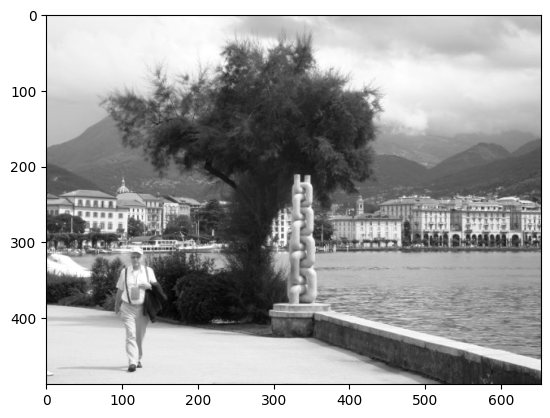

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [6]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)
S

array([8.97985806e+04, 1.89564579e+04, 1.16658813e+04, 7.13788847e+03,
       6.95607224e+03, 5.68508009e+03, 4.93633815e+03, 4.55887205e+03,
       3.85124233e+03, 3.30613885e+03, 3.17179381e+03, 2.86882742e+03,
       2.75958529e+03, 2.50321495e+03, 2.38571833e+03, 2.26426788e+03,
       1.91396543e+03, 1.80157331e+03, 1.76270285e+03, 1.73434931e+03,
       1.65792656e+03, 1.57439626e+03, 1.51158743e+03, 1.45783349e+03,
       1.42708389e+03, 1.40515558e+03, 1.36695861e+03, 1.28609846e+03,
       1.23873230e+03, 1.23626376e+03, 1.20092984e+03, 1.15810927e+03,
       1.14846327e+03, 1.08294304e+03, 1.06575655e+03, 1.04302470e+03,
       1.02462328e+03, 9.88781178e+02, 9.75822029e+02, 9.65278023e+02,
       9.23820893e+02, 8.93159283e+02, 8.75166366e+02, 8.51109033e+02,
       8.39257750e+02, 8.09142198e+02, 7.94599850e+02, 7.85294500e+02,
       7.63564203e+02, 7.44337195e+02, 7.37685308e+02, 7.19620197e+02,
       7.14705002e+02, 7.05349370e+02, 6.81231383e+02, 6.74234870e+02,
      

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

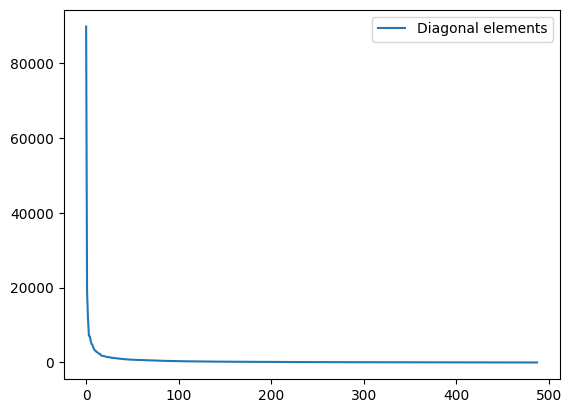

In [7]:
plt.plot(S, label = "Diagonal elements")
plt.legend()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

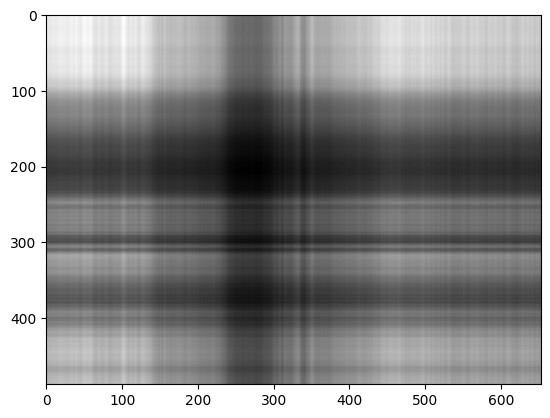

In [8]:
imgplot = plt.imshow((U[:, [0]] * S[0]) @ VT[[0], :], cmap='gray')
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Такая ситуация вполне ожидаема

Пояснение: большОй вкалд в наше изображение вносит не только первая компонента нашей матрицы, но и несколько последующих, это видно из нашего графика выше

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

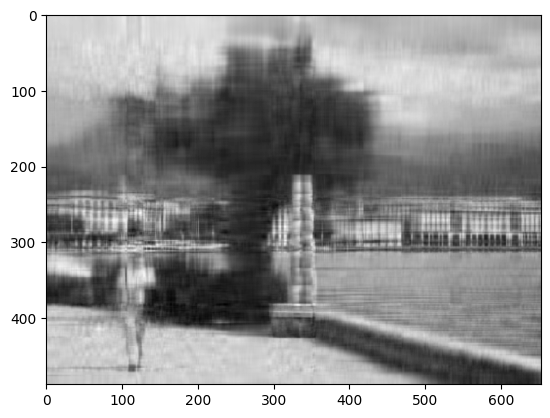

In [9]:
imgplot = plt.imshow(U[:, 0:20]  @ np.diag(S)[0:20, 0:20] @ VT[0:20, :], cmap='gray')
# с первой по двадцатую

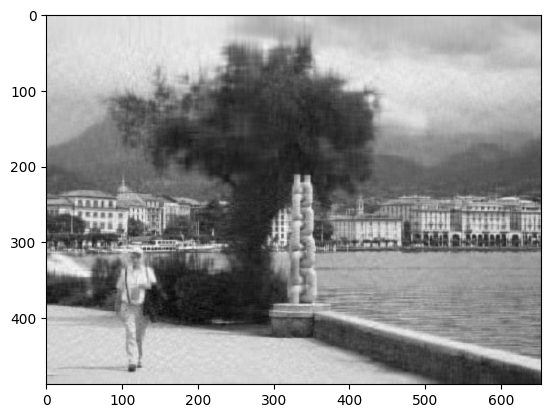

In [10]:
imgplot = plt.imshow(U[:, 0:50]  @ np.diag(S)[0:50, 0:50] @ VT[0:50, :], cmap='gray')
# с первой по пятидесятую

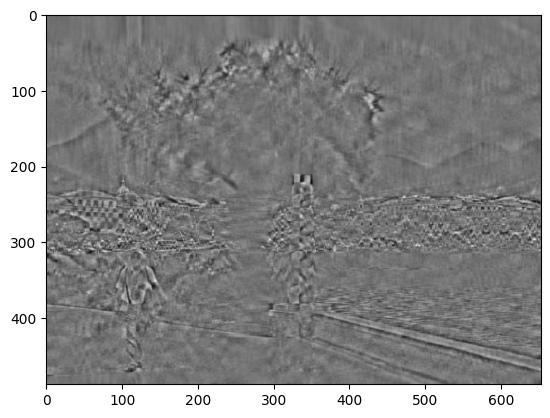

In [11]:
imgplot = plt.imshow(U[:, 20:100]  @ np.diag(S)[20:100, 20:100] @ VT[20:100, :], cmap='gray')
# с двадцатой по сотую

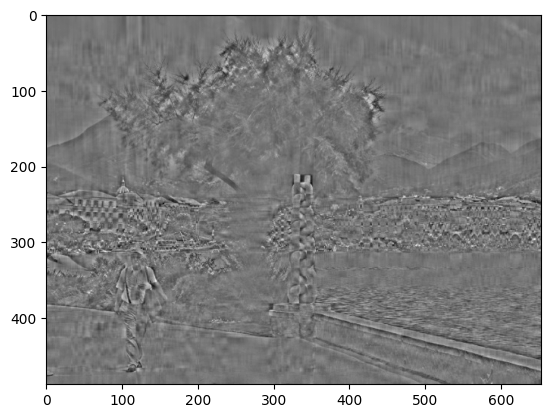

In [13]:
imgplot = plt.imshow(U[:, 20:]  @ np.diag(S)[20:, 20:] @ VT[20:, :], cmap='gray')
# с двадцатой по последнюю

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Если мы сделаем разложение по всем элементам то мы просто получим нашу матрицу А, то есть исходное изображение без урезаний. Как показано на графике и на практике выше, можем сделать вывод что первые 50 компонент наиболее важны для нашего изображения, поскольку их значения наибольшие при разложении. Для более детализированной картинки возьмём ещё 30 значений сверху, чтобы лучше проявить детали, убрать шум на изображении и сгладить само изображение от резких углов. Как итог получим изображение приближенное к оригиналу но которое будет занимать меньше памяти

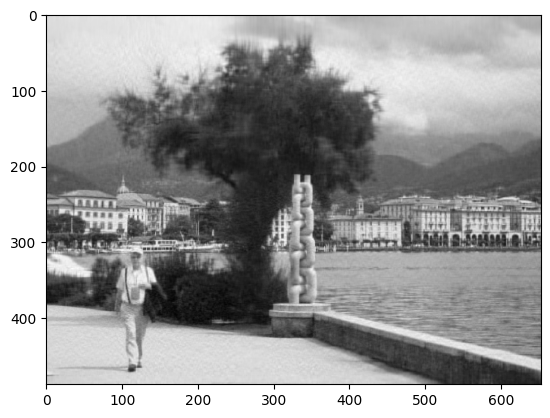

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
imgplot = plt.imshow(U[:, 0:80]  @ np.diag(S)[0:80, 0:80] @ VT[0:80, :], cmap='gray')

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Для того чтобы произвести подсчёты посмотрим на исходные данные матриц:

In [15]:
print("Размер U: ", U[:, 0:80].shape)
print("Размер S: ", np.diag(S)[0:80, 0:80].shape)
print("Размер VT: ", VT[0:80, :].shape)

Размер U:  (488, 80)
Размер S:  (80, 80)
Размер VT:  (80, 653)


получим m = 488, n = 653, если матрица m x n
тогда при хранении матриц $U_r$, $V_r$ и $Σ_r$, тогда посчитаем на сколько у нас будет экономия:
$r\cdot m \ + \ r \cdot n \ + \ r \ = \ r \cdot (m + n + 1)$ :

$r = 80$

$\frac{488 \cdot 653}{80 \cdot (488 + 653 + 1)} = 3,488$

то есть мы сэкономим памяти примерно в 3,5 раза.

Проверим на практике

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

In [16]:
import sys
A_r = sys.getsizeof(np.matrix(U[:, :80])) + sys.getsizeof(S[:80]) + sys.getsizeof(np.matrix(VT[:80, :]))
A = sys.getsizeof(img)
print(A,' ', 'размер исходной матрицы')
print(A_r, ' ', 'размер новых матрц')
print('выгоднее хранить в', ' ', A / A_r, 'раз(а)')

2549440   размер исходной матрицы
730656   размер новых матрц
выгоднее хранить в   3.4892480182192442 раз(а)


Итог: свопало с аналитическими вычислениями

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

1)

Выбирем линейный оператор $\phi$, которому соответствует матрица $X^TX = V\Sigma^2V^T$, то есть матрица грамма, а поэтому является самоспоряжённой. В $V$ находится $ОНБ$ из собственных векторов с собственными значениями $\langle \sigma^{2}_1, \ldots, \sigma^{2}_n \rangle$, обозначим за $\langle v_1, \ldots, v_n \rangle$. Рассмотрим наш вектор $w$, как линейную комбинацию в нашем базисе, где его координаты $\langle \alpha_1, \ldots, \alpha_n \rangle$. Рассмотрим $\phi(w)$:

$$\phi(w) = \phi(\alpha_1v_1 + \cdots + \alpha_nv_n) = \alpha_1\phi(v_1) + \cdots + \alpha_n\phi(v_n)$$

Из того что базис состоит из собственных значений следует:

$$\phi(w) = \alpha_1\sigma^{2}_1v_1 + \cdots + \alpha_n\sigma^2v_n = X^TXw$$

Рассмотрим $|Xw|$:
$$|Xw|^{2} = (Xw, Xw) = (Xw)^{T}(Xw) = w^{T}X^{T}Xw = (\alpha_1 \cdots \alpha_n ) \begin{pmatrix}\alpha_1\sigma^2_1 \\ \alpha_2\sigma^2_2 \\ \cdots \\ \alpha_n\sigma^2_n\end{pmatrix} = \alpha^2_1\sigma^{2}_1 + \cdots + \alpha^2_n\sigma^2_n$$

Возьмем корень и оценим сверху:

$$|Xw| = \alpha_1\sigma_1 + \cdots + \alpha_n\sigma_n \le \sigma_1|w| ⇒ \frac{|Xw|}{|w|} \le \sigma_1$$

Если $w$  первый собственный вектор из нашего базиса, получим:

$$|Xw|^{2} = (Xw, Xw) = (Xw)^{T}(Xw) = w^{T}X^{T}Xw = (1, 0  \cdots 0) \begin{pmatrix}1\sigma^2_1 \\ 0\sigma^2_2 \\ \cdots \\ 0\sigma^2_n\end{pmatrix} = \sigma^{2}_1 = \sigma^{2}_1|w|^2 (|w|^2 = 1)$$

Таким образом равенство доказано:

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$$

2)

Очевидно, что
$\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ из прошлого утверждения так, как в первом случае мы отнормировали вектор, разделив на длину самого себя. А тут мы сразу выбраем векторы единичной длины, что означает равенство по пункту 1)


3)
Оценив наше выражение получим что, равенство достигается при пропорциональности

$$|u^T Xv| <= |u^T||Xv| \\ Xv <= \sigma^2_1|v| \\ |u^T Xv| <= |u^T||Xv| <= |u^T|\cdot \sigma_1 \cdot |v| \\ |u^T| = 1 \\ |v| = 1 \\ |u^T Xv| = \sigma_1$$

Также возьмем собственный вектор $w$ и пропорциональный вектор $Xv$, тогда равенство достигнется

$$|Xw|^2 = w^TX^TXw = w^T\sigma^2_1w \\ w^Tw = 1 ⇒ = \sigma^2_1$$


**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Заметим, что строки матрицы это
$\begin{pmatrix}
\cos(0) \ \ cos(1) \ \ldots\ cos(n)\\
\end{pmatrix}$
домноженные на $\sin(i)$. Из этого следует, что все строки линейно зависимы, а значит $rkA = 1$. Значит $r=1$

Также заметим, что следующее разложение гарантирует нам исходную матрицу

$$\begin{pmatrix} \sin(0)\\ sin(1)\\ \ldots \\ \sin(n-1) \end{pmatrix}\begin{pmatrix}σ\end{pmatrix}\begin{pmatrix}\cos(0) & cos(1) & \ldots & cos(n-1)\end{pmatrix}$$

, где $\sigma > 0$

Теперь отнормируем крайние векторы разделив на их длину, и изменим сигму, чтобы она компенсировала это изменение:

$$\begin{pmatrix} \frac{\sin(0)}{\sqrt{sin^{2}(0) + sin^{2}(1) + \ldots + sin^{2}(n-1)}}\\ \frac{\sin(1)}{\sqrt{sin^{2}(0) + sin^{2}(1) + \ldots + sin^{2}(n-1)}}\\ \ldots \\ \ \frac{\sin(n)}{\sqrt{sin^{2}(0) + sin^{2}(1) + \ldots + sin^{2}(n-1)}} \end{pmatrix}\begin{pmatrix}σ\end{pmatrix}\begin{pmatrix}\ \frac{\cos(0)}{\sqrt{cos^{2}(0) + cos^{2}(1) + \ldots + cos^{2}(n-1)}} & \frac{\cos(1)}{\sqrt{cos^{2}(0) + cos^{2}(1) + \ldots + cos^{2}(n-1)}} & \ldots & \frac{\cos(n)}{\sqrt{cos^{2}(0) + cos^{2}(1) + \ldots + cos^{2}(n-1)}}\end{pmatrix}$$

Тогда $σ = \sqrt{(\sin^{2}(0) + \sin^{2}(1) + \ldots + \sin^{2}(n-1))(\cos^{2}(0) + \cos^{2}(1) + \ldots + \cos^{2}(n-1))} > 0$

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Рассмотрим разложение $Σ$ : $U, V$ - ортогональные матрицы $⇒$ $∃ U^{-1} V^{-1}$

$Σ = U^{-1} A V$, таким образом $U$ нам задает матрицу ортонормированного базиса $ℝ^{m}$, a $V$, в свою очередь, задает матрицу ортонормированного базиса $ℝ^{n}$

Используем формулу для лин. отображений:
$$\begin{pmatrix} \phi(v_{1}), \phi(v_{2}) \ldots \phi(v_{n})  \end{pmatrix} = \begin{pmatrix} u_{1}, u_{2} \ldots & u_{m} \end{pmatrix} \begin{pmatrix} σ_{1} & 0 & 0 & \ldots & 0 \\ 0 & \ddots & 0 & \ldots & 0 \\ 0 & \ldots & σ_{r} & \ldots & 0 \\ \cdots & \cdots & \cdots & ⋯ & \cdots \\ 0 & 0 & 0 & 0 & 0\end{pmatrix}$$

Заметим, что $ϕ(u_{i}) = 0$, при $i > r$, таким образом $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$ (те что переходят в 0).

Тогда получим $v_{r+1}, \ldots, v_n $ - базис $\text{Ker}\mathcal{A}$, а $ \phi(v_{1}), \ldots, \phi(v_{r})$ - базис $\text{Im}\mathcal{A}$, эта система в свою очередь выражается через $\langle \sigma_1u_1, \ldots, \sigma_ru_r \rangle$, что входит в линейную комбинацию $\langle u_1, \ldots, u_r \rangle$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Так как столбцы $A$ линейно независимые, тогда $rkA = n$, рассмотрим сингулярное разложение
$A = UΣV^{T}$

Распишем $P$, (господи я не могу так больше кто эти задания придумывает я схожу с ума):

$$P = UΣV^{T}(VΣ^{T}U^{T}UΣV^{T})^{-1}VΣ^{T}U^{T} \Rightarrow P = UΣV^{T}(VΣ^{T}EΣV^{T})^{-1}VΣ^{T}U^{T} \Rightarrow \\ \Rightarrow P = UΣV^{T}(ΣV^{T})^{-1}(VΣ^{T})^{-1}VΣ^{T}U^{T} \Rightarrow  P = UΣV^{T}VΣ^{-1}(Σ^{-1})^{T}V^{-1}VΣ^{T}U^{T} \Rightarrow \\ \Rightarrow Σ = Σ^{-1} \Rightarrow V^{T} = V^{-1} \\ P = UΣV^{T}V\begin{pmatrix}\frac{1}{σ^{2}_{1}} & 0 & 0 & \ldots & 0 \\ 0 & \frac{1}{σ^{2}_{2}} & 0 &  \ldots & 0 \\ 0 & \ldots & \frac{1}{σ^{2}_{n}} & \dots & 0 \\ 0 & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & 0 & 0\end{pmatrix}V^{T}VΣ^{T}U^{T} \\ V^{T}V = E \\ P = UΣ\begin{pmatrix}\frac{1}{σ^{2}_{1}} & 0 & 0 & \ldots & 0 \\ 0 & \frac{1}{σ^{2}_{2}} & 0 &  \ldots & 0 \\ 0 & \ldots & \frac{1}{σ^{2}_{n}} & \dots & 0 \\ 0 & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & 0 & 0\end{pmatrix}Σ^{T}U^{T} \\ P = U\begin{pmatrix}\frac{σ^{2}_{1}}{σ^{2}_{1}} & 0 & 0 & \ldots & 0 \\ 0 & \frac{σ^{2}_{2}}{σ^{2}_{2}} & 0 &  \ldots & 0 \\ 0 & \ldots & \frac{σ^{2}_{n}}{σ^{2}_{n}} & \dots & 0 \\ 0 & \ldots & \ldots & \ldots & \ldots \\ 0 & 0 & 0 & 0 & 0\end{pmatrix}U^{T}$$

Получили SVD разложение: $U$ и $U^{T}$ ортогональные матрицы, тогда нужная нам $Σ_{result}$ приобретает вид матрицы m x m следующего вида:

$$Σ_{result} =
\begin{pmatrix}
1 & 0 & 0 & \ldots & 0 \\
0 & 1 & 0 &  \ldots & 0 \\
0 & \ldots & 1& \dots & 0 \\
0 & \ldots & \ldots & \ldots & \ldots \\
0 & 0 & 0 & 0 & 0 \end{pmatrix}$$ где n едениц

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


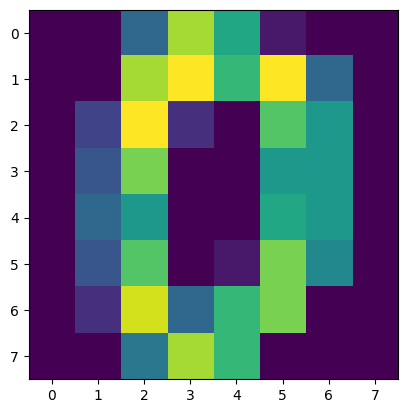

In [17]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

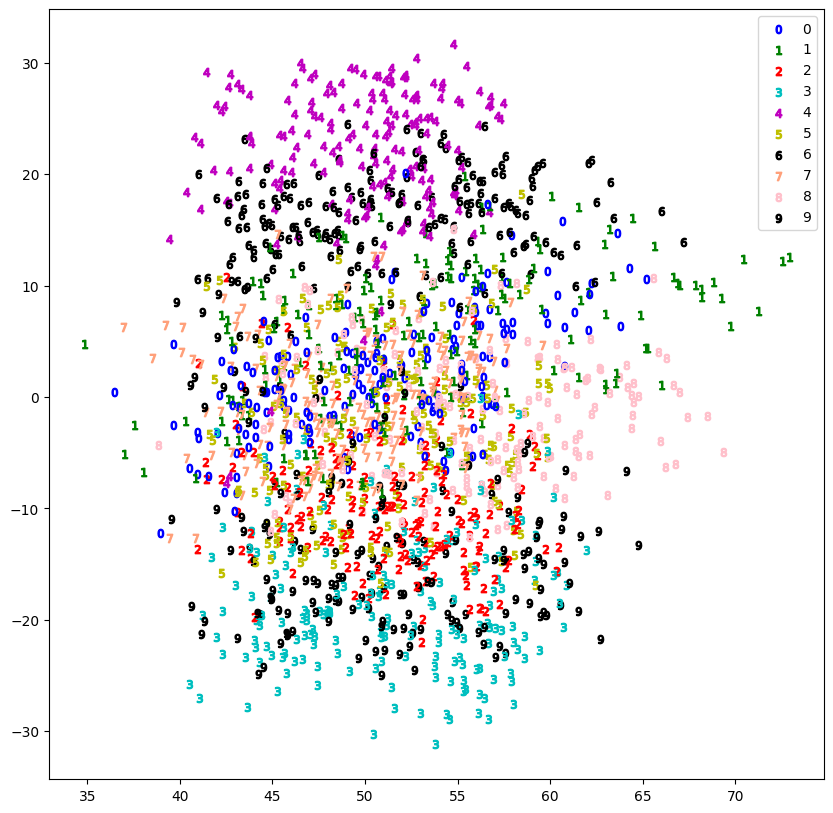

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
colors = ['b','g','r','c','m','y','k','lightsalmon','pink','black']
A_2 = U @ np.diag(S)[:, :2]
plt.figure(figsize=(10, 10))
for i in range(A_2.shape[0]):
    plt.scatter(A_2[i, 0], A_2[i, 1] , marker=r'$' + str(digits.target[i]) + '$', color = colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

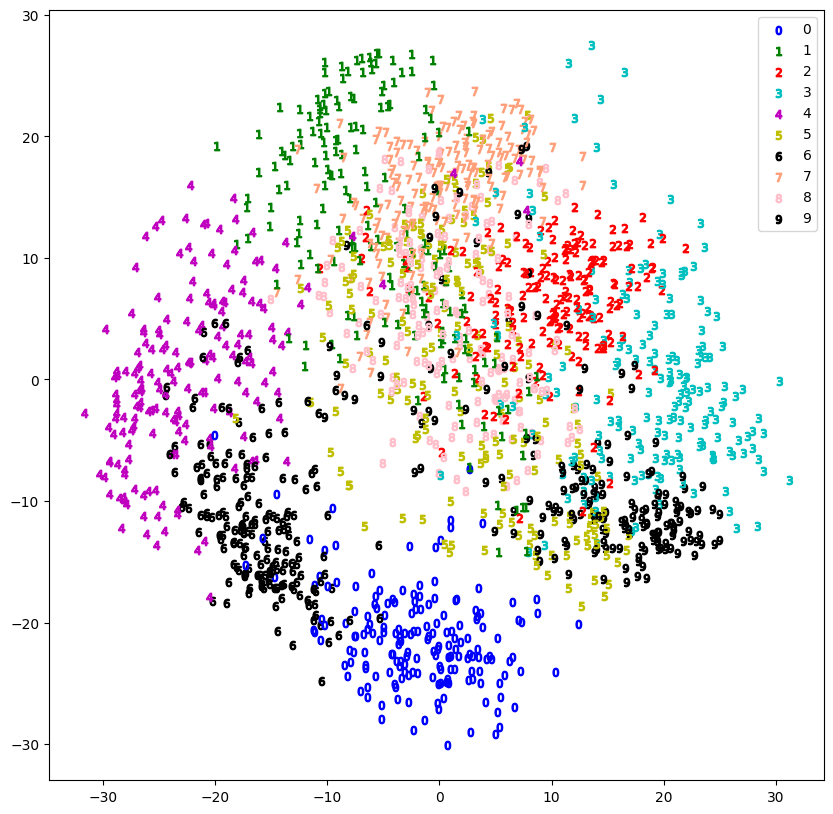

In [20]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
digits_new = digits.data.copy()
for i in range(digits_new.shape[1]):
    digits_new[:, i] = digits_new[:, i] - np.mean(digits_new[:, i])

U_new, S_new, VT_new = svd(digits_new, full_matrices=False)

A_new = U_new @ np.diag(S_new)[:, :2]
plt.figure(figsize=(10, 10))
for i in range(A_new.shape[0]):
    plt.scatter(A_new[i, 0], A_new[i, 1] , marker=r'$' + str(digits.target[i]) + '$', color = colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Наши признаки во втором случае стали располагалться около начала координат, а также явно сгрупированны в отличии от первой визуализации. Как итог последеяя более структурированная и более удобнафя



**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

Text(0.5, 1.0, 'параметры - 2')

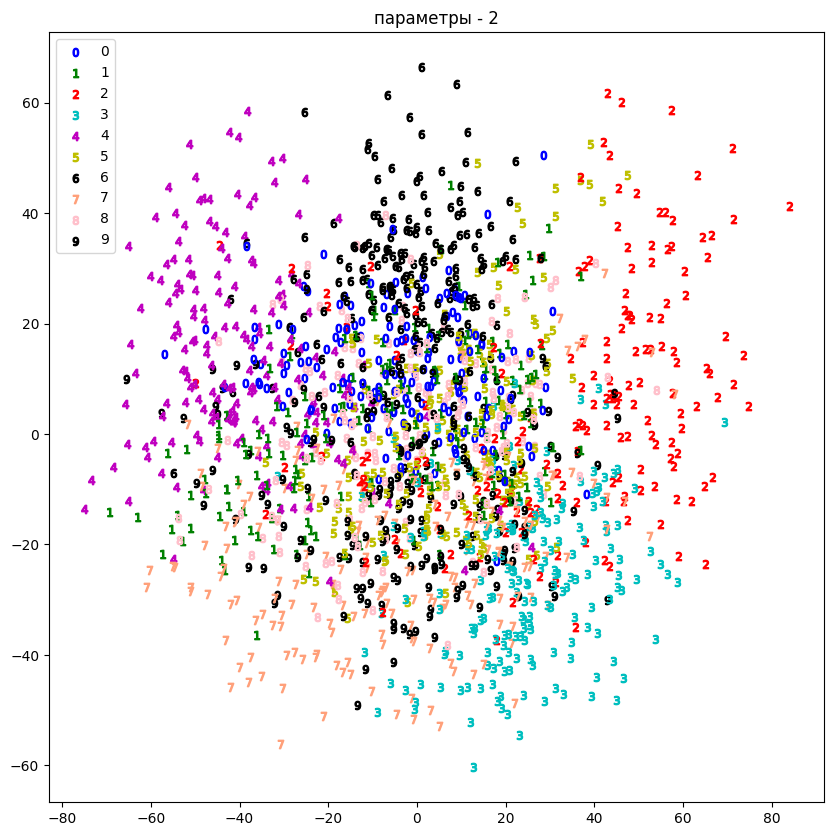

In [21]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.random_projection import GaussianRandomProjection
alpha = np.random.RandomState(42)
gauss1 = GaussianRandomProjection(n_components=2, random_state=alpha) # пробуем разные значения компонент
gauss2 = GaussianRandomProjection(n_components=3, random_state=alpha)
gauss3 = GaussianRandomProjection(n_components=4, random_state=alpha)
first = gauss1.fit_transform(digits_new) # сразу применим вычитание среднего
second = gauss2.fit_transform(digits_new)
third = gauss3.fit_transform(digits_new)
plt.figure(figsize=(10, 10))
for i in range(first.shape[0]):
    plt.scatter(first[i, 0], first[i, 1] , marker=r'$' + str(digits.target[i]) + '$', color = colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('параметры - 2')

Text(0.5, 1.0, 'параметры - 3')

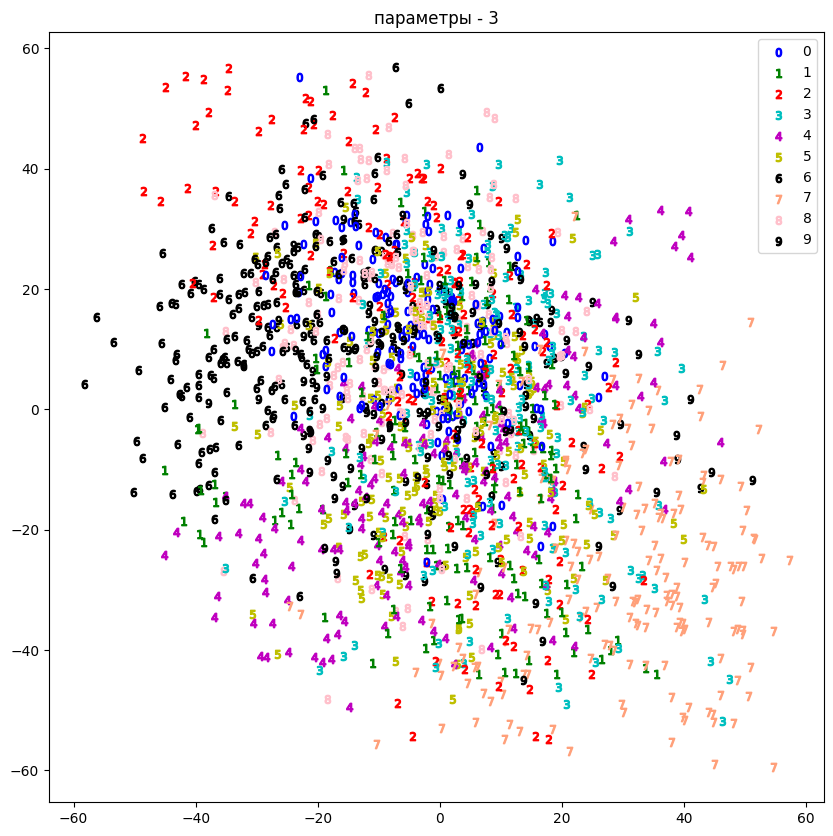

In [23]:
plt.figure(figsize=(10, 10))
for i in range(second.shape[0]):
    plt.scatter(second[i, 0], second[i, 1] , marker=r'$' + str(digits.target[i]) + '$', color = colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('параметры - 3')

Text(0.5, 1.0, 'параметры - 4')

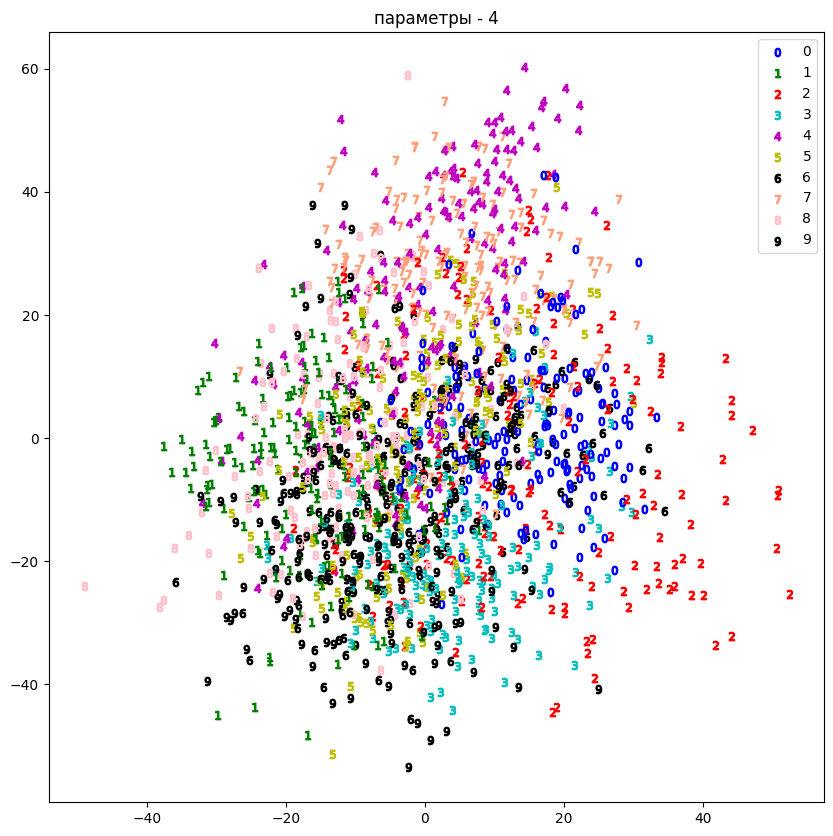

In [24]:
plt.figure(figsize=(10, 10))
for i in range(third.shape[0]):
    plt.scatter(third[i, 0], third[i, 1] , marker=r'$' + str(digits.target[i]) + '$', color = colors[digits.target[i]])
plt.legend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.title('параметры - 4')

Можем заметить что гаусовское размытие не даёт такого чёткого результата как CVD, поэтому лучше не использовать другие методы CVD

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$:

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [25]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set_theme()
df = sns.load_dataset("penguins")

<ipython-input-26-56259113fdad>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-26-56259113fdad>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s, hist=False, kde=True,
<ipython-input-26-56259113fdad>:14: UserWarning: 

`distplot` is a

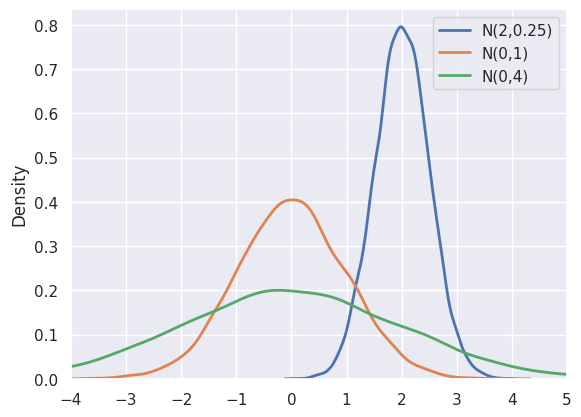

In [26]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True,
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат.
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

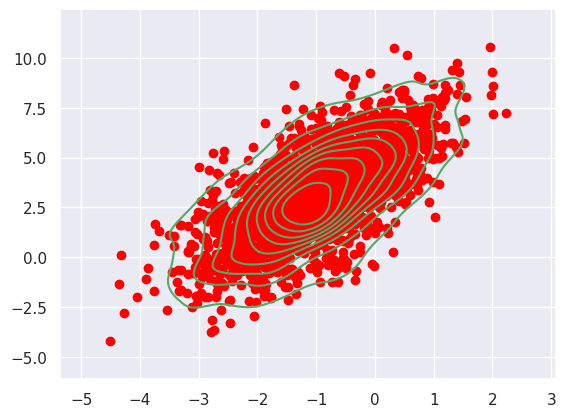

In [28]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)

plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(x=s[:,0], y=s[:,1], fill=False, color='g')
plt.show()


Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [29]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

N = 1000
s1 = np.random.multivariate_normal(mean=np.array([0, 0]), cov=np.array([[1, -2], [-2, 5]]), size=N)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

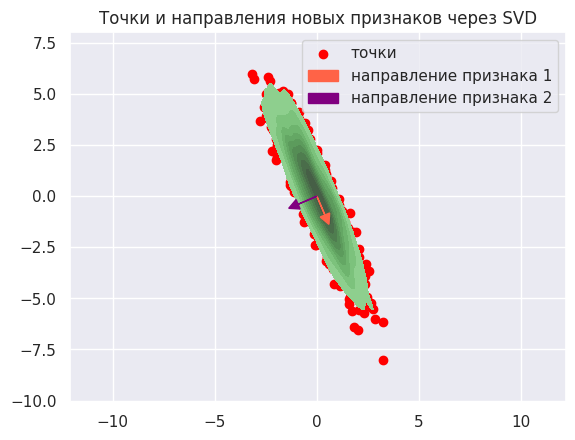

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from scipy.linalg import sv

plt.title('Точки и направления новых признаков через SVD')
plt.axis('equal')

U, S, VT = svd(s1, full_matrices=False)
plt.scatter(s1[:,0], s1[:,1], color='red', label='точки')
sns.kdeplot(x=s1[:,0], y=s1[:,1], fill=True, color='lightgreen')
plt.arrow(0, 0, VT[0, 0], VT[0, 1], head_width=0.5, head_length=0.5, fc='tomato', ec='tomato', label='направление признака 1')
plt.arrow(0, 0, VT[1, 0], VT[1, 1], head_width=0.5, head_length=0.5, fc='purple', ec='purple', label='направление признака 2')

plt.legend()
plt.show()


**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Расммотрим матрицу линейного оператора, соответсвующей матрицы ковариации. Так как она симметричная, то мы имеем дело с матрицей самосопряженного линейного оператора (возьмем в качестве базиса ортнормированный базис в $ℝ^{2}$. Найдем собственные значения матрицы ковариации:

$$det\begin{pmatrix}
1 - λ & -2\\
-2 & 5 - \lambda
\end{pmatrix} = λ^{2}-6λ+1$$

Таким образом имеем корни характеристического многочлена:

$$λ_{1} = 3 + 2\sqrt{2} \\ \lambda_{2} = 3 - 2\sqrt{2}$$

Найдем базис $V_{λ{1}}$

$$\begin{pmatrix}
-2 - 2\sqrt{2} & -2\\
-2 & 2 - 2\sqrt{2}
\end{pmatrix} \Rightarrow \ УСВ \ \begin{pmatrix}
1 & \sqrt{2} - 1\\
0 & 0
\end{pmatrix}$$

Тогда ФСР : $v_{1}$ = $\begin{pmatrix} 1 - \sqrt{2} \\ 1\end{pmatrix}$

Отнормируем:

$|v_{1}| = \sqrt{(1 - \sqrt{2})^{2} + 1} = \sqrt{4 - 2\sqrt{2}}$

Тогда $e_{1} = \frac{1}{\sqrt{4 - 2\sqrt{2}}}
\begin{pmatrix} 1 - \sqrt{2} \\ 1\end{pmatrix}$

Теперь найдем базис $V_{λ{2}}$:

$$\begin{pmatrix}
-2 + 2\sqrt{2} & -2\\
-2 & 2 + 2\sqrt{2}
\end{pmatrix} \Rightarrow \ УСВ \ \begin{pmatrix}
1 & - \sqrt{2} - 1\\
0 & 0
\end{pmatrix}$$

Тогда ФСР : $v_{2}$ = $\begin{pmatrix} 1 + \sqrt{2} \\ 1\end{pmatrix}$

Отнормируем:

$|v_{2}| = \sqrt{(1 + \sqrt{2})^{2} + 1} = \sqrt{4 + 2\sqrt{2}}$

Тогда $e_{2} = \frac{1}{\sqrt{4 + 2\sqrt{2}}}
\begin{pmatrix} 1 + \sqrt{2} \\ 1\end{pmatrix}$

Так как мы имеем дело с самосопряженным оператором то $V_{\lambda_{1}}$ ортогонально $V_{\lambda_{2}}$, соответственно мы нашли ортогональный базис $e_{1} e_{2}$, в котором матрица примет вид: $$\begin{pmatrix}
3 + 2\sqrt{2} & 0\\
0 & 3 - 2\sqrt{2}
\end{pmatrix}$$

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже.

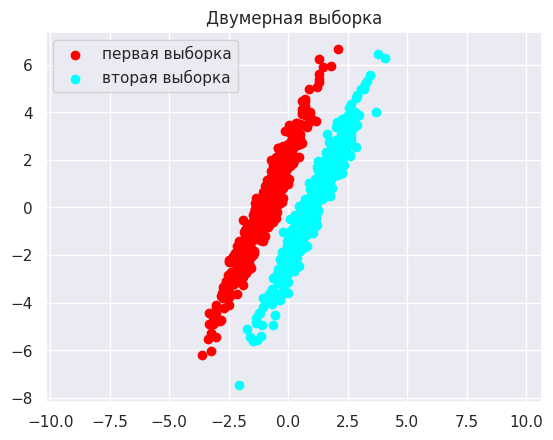

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

N = 500
plt.title("Двумерная выборка")
plt.axis('equal')
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,2.17],[2.17,5]]), size=N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[1,2.17],[2.17,5]]), size=N)
plt.scatter(s1[:,0], s1[:,1], color='red', label='первая выборка')
plt.scatter(s2[:,0], s2[:,1], color='aqua', label='вторая выборка')
plt.legend()

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

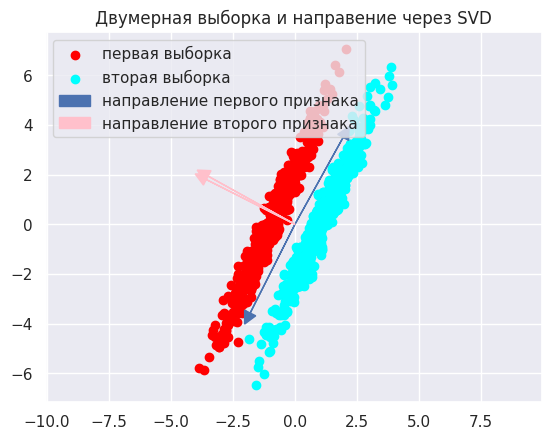

In [34]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

N = 500
plt.title("Двумерная выборка и направение через SVD")
plt.axis('equal')
s1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[1,2.17],[2.17,5]]), size=N)
s2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[1,2.17],[2.17,5]]), size=N)
plt.scatter(s1[:,0], s1[:,1], color='red', label='первая выборка')
plt.scatter(s2[:,0], s2[:,1], color='aqua', label='вторая выборка')
plt.legend()

U1, S1, VT1 = svd(s1, full_matrices=False)
U2, S2, VT2 = svd(s2, full_matrices=False)
plt.arrow(0, 0, 4 * VT1[0, 0], 4 * VT1[0, 1], head_width=0.5, head_length=0.5, fc='b', ec='b', label='направление первого признака')
plt.arrow(0, 0, 4 * VT1[1, 0], 4 * VT1[1, 1], head_width=0.5, head_length=0.5, fc='pink', ec='pink', label='направление второго признака')
plt.arrow(0, 0, 4 * VT2[0, 0], 4 * VT2[0, 1], head_width=0.5, head_length=0.5, fc='b', ec='b')
plt.arrow(0, 0, 4 * VT2[1, 0], 4 * VT2[1, 1], head_width=0.5, head_length=0.5, fc='pink', ec='pink')
plt.legend()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

По графику видно, что первый признак, помеченный синей стрелкой почти ровно разделяет две выборки, а значит именно его можно взять в качестве функци $f(x)$.

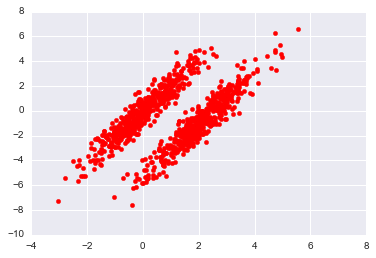

In [ ]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

s_res = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=1000)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Из того, что все ковариации равны нулю следует, что остается только дисперсия по каждой из компонент, которая задается собственными значениями матрицы. Собственные векторы определяют направления полуосей нашего эллипса.
(Заметим, что $x^TΣ^{-1}x = 1$ будет уравнением n-мерного эллипсоида)

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

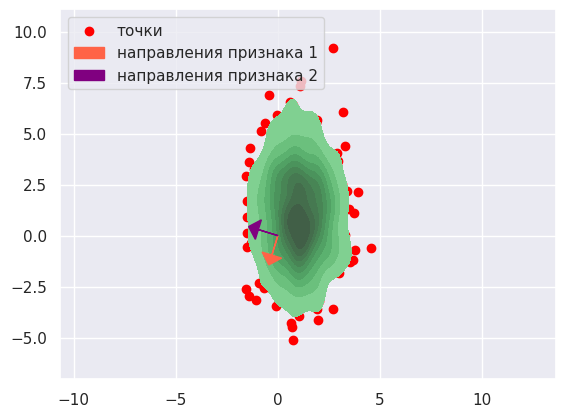

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.linalg import svd

U_res, S_res, VT_res = svd(s_res, full_matrices=False)
plt.axis('equal')
plt.scatter(s_res[:,0], s_res[:,1], color='red', label='точки')
sns.kdeplot(x=s_res[:,0], y=s_res[:,1], fill=True, color='g')

plt.arrow(0, 0, VT_res[0, 0], VT_res[0, 1], head_width=1, head_length=0.5, fc='tomato', ec='tomato', label='направления признака 1')
plt.arrow(0, 0, VT_res[1, 0], VT_res[1, 1], head_width=1, head_length=0.5, fc='purple', ec='purple', label='направления признака 2')

plt.legend()
plt.show()


**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Проблема заключается в том, что наше облако не центрированно в нуле, из-за этого признаки не показывают нужные нам направления осей. Перед тем как использовать SVD нужно убедиться, что мы из каждого признака вычитаем его среднее значение, чтобы более точно наложить проекцию на признаки.